Projeto apresentado como trabalho final do módulo de Técnicas de Programação I - Turma Be Tech Braskem

- Análise dataset de mortes e vacinação por covid. O dataset foi encontrado no kaggle neste link: https://www.kaggle.com/datasets/tohidkhanbagani/covid-19-deaths-and-vaccinations-dataset

In [1]:
#importando bibliotecas a serem utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importando datasets
mortes = pd.read_csv("/content/COVID DEATHS.csv")
vacinas = pd.read_csv("/content/COVID_VACCINATIONS.csv")

<ipython-input-3-48da293c8aa3>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  vacinas = pd.read_csv("/content/COVID_VACCINATIONS.csv")


##Visualizando estrutura dos datasets

In [ ]:
mortes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107649 entries, 0 to 107648
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   iso_code                            107649 non-null  object 
 1   continent                           102849 non-null  object 
 2   location                            107648 non-null  object 
 3   date                                107648 non-null  object 
 4   population                          107648 non-null  float64
 5   total_cases                         99706 non-null   float64
 6   new_cases                           106406 non-null  float64
 7   new_cases_smoothed                  105951 non-null  float64
 8   total_deaths                        92265 non-null   float64
 9   new_deaths                          106429 non-null  float64
 10  new_deaths_smoothed                 105979 non-null  float64
 11  total_cases_per_million   

In [ ]:
mortes.describe()

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
count,3.027490e+05,2.667710e+05,2.940640e+05,2.928000e+05,2.462140e+05,294139.000000,292909.000000,266771.000000,294064.000000,292800.000000,...,292909.000000,184817.000000,34866.000000,34866.000000,35242.000000,35242.000000,9139.000000,9139.0000,21368.000000,21368.000000
mean,1.283508e+08,5.525632e+06,1.100018e+04,1.104556e+04,7.890977e+04,97.976117,98.374032,84395.533693,165.822440,166.511964,...,1.044517,0.911495,720.721247,17.148603,4246.360961,144.904129,375.013459,11.3581,4571.093551,92.629297
std,6.604840e+08,3.465076e+07,1.043446e+05,1.016488e+05,4.087464e+05,606.914602,597.602496,134636.639039,1134.538414,642.891130,...,2.947081,0.399925,2252.227456,23.534129,10428.660216,160.506688,546.069941,14.2461,11468.058763,91.271399
min,4.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,4.490020e+05,6.265000e+03,0.000000e+00,1.286000e+00,1.180000e+02,0.000000,0.000000,1889.971500,0.000000,0.294000,...,0.000000,0.720000,25.000000,3.027250,262.250000,39.214000,30.000000,2.6020,280.000000,29.844000
50%,5.882259e+06,5.986600e+04,1.900000e+01,4.000000e+01,1.193000e+03,0.000000,0.286000,19249.100000,2.808000,11.391000,...,0.038000,0.950000,111.000000,7.754000,876.000000,91.105000,141.000000,6.1720,957.000000,68.038000
75%,2.830170e+07,6.149885e+05,5.610000e+02,6.530000e+02,1.038675e+04,6.000000,7.000000,102486.778500,73.163500,108.147500,...,0.794000,1.140000,480.000000,21.441000,3349.250000,190.830750,494.000000,14.7300,4341.250000,125.057250
max,7.975105e+09,7.627904e+08,7.460100e+06,6.410233e+06,6.897012e+06,20005.000000,14578.571000,731762.140000,228872.025000,37241.781000,...,148.641000,5.870000,28891.000000,180.675000,154497.000000,1526.846000,4838.000000,224.9760,153977.000000,708.120000


In [ ]:
mortes.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mortes.sample(10)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
87076,FRO,Europe,Faeroe Islands,9/13/2022,53117,34658.0,0.0,0.000,28.0,0.0,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147544,LBR,Africa,Liberia,3/8/2021,5302690,2035.0,0.0,1.714,91.0,0.0,...,0.000,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20985,BHR,Asia,Bahrain,9/24/2021,1472237,274614.0,90.0,90.571,1389.0,1.0,...,0.097,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141085,KWT,Asia,Kuwait,2/28/2023,4268886,663456.0,0.0,0.000,2570.0,0.0,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173280,MCO,Europe,Monaco,8/28/2020,36491,125.0,3.0,3.286,1.0,0.0,...,0.000,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149593,LIE,Europe,Liechtenstein,3/30/2020,39355,65.0,1.0,2.429,NaN,0.0,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211408,PER,South America,Peru,10/2/2021,34049588,2176321.0,1016.0,835.143,199395.0,28.0,...,1.003,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180161,MOZ,Africa,Mozambique,2/15/2023,32969520,233098.0,0.0,13.571,2242.0,0.0,...,0.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125168,IRQ,Asia,Iraq,3/11/2022,44496124,2311238.0,699.0,735.143,25090.0,8.0,...,0.199,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172401,MDA,Europe,Moldova,7/11/2021,3272993,257419.0,76.0,69.714,6756.0,1.0,...,0.567,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mortes.shape

(107649, 26)

In [ ]:
vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302749 non-null  object 
 1   continent                                   288347 non-null  object 
 2   location                                    302749 non-null  object 
 3   date                                        302749 non-null  object 
 4   total_tests                                 79387 non-null   float64
 5   new_tests                                   75403 non-null   float64
 6   total_tests_per_thousand                    79387 non-null   float64
 7   new_tests_per_thousand                      75403 non-null   float64
 8   new_tests_smoothed                          103965 non-null  float64
 9   new_tests_smoothed_per_thousand             103965 non-null  float64
 

In [ ]:
vacinas.describe()

,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,7.374700e+04,7.059300e+04,...,175955.000000,173562.000000,114845.000000,207046.000000,278389.000000,227359.000000,1.029500e+04,10295.000000,10295.000000,10295.000000
mean,2.110457e+07,6.728541e+04,924.255256,3.272949,1.421784e+05,2.826853,0.098241,2.403633e+03,3.652473e+08,1.632980e+08,...,10.796895,32.912070,50.794372,3.098034,73.721399,0.723051,4.727287e+04,9.535368,12.996518,1453.830948
std,8.409869e+07,2.477340e+05,2195.428501,9.033848,1.138215e+06,7.308229,0.116121,3.344366e+04,1.392531e+09,6.205725e+08,...,10.781931,13.572489,31.956624,2.548704,7.397024,0.149347,1.377826e+05,13.082029,26.634303,1830.272539
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,...,0.100000,7.700000,1.190000,0.100000,53.280000,0.390000,-3.772610e+04,-44.230000,-95.920000,-1984.280000
25%,3.646540e+05,2.244000e+03,43.590000,0.290000,1.486000e+03,0.200000,0.020000,7.100000e+00,1.437034e+06,8.336960e+05,...,1.900000,22.600000,20.860000,1.300000,69.590000,0.600000,2.185000e+01,0.420000,-1.040000,15.450000
50%,2.067330e+06,8.783000e+03,234.140000,0.970000,6.570000e+03,0.850000,0.060000,1.750000e+01,1.091526e+07,5.356759e+06,...,6.300000,33.100000,49.840000,2.500000,75.050000,0.740000,4.464500e+03,7.750000,6.750000,881.370000
75%,1.024845e+07,3.722900e+04,894.375000,2.910000,3.220500e+04,2.580000,0.140000,5.460000e+01,7.966960e+07,3.961260e+07,...,19.300000,41.300000,83.240000,4.200000,79.460000,0.830000,3.174990e+04,15.520000,18.545000,2372.125000
max,9.214000e+09,3.585563e+07,32925.830000,531.060000,1.476998e+07,147.600000,1.000000,1.023632e+06,1.336990e+10,5.573659e+09,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.960000,1.282260e+06,76.550000,377.040000,10329.520000


In [ ]:
vacinas.head()

,iso_code,continent,location,date,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN


In [ ]:
vacinas.shape

(302749, 45)

## Reunindo os dois datasets em um só

In [ ]:
## colunas em comum
set(mortes.columns) & set(vacinas.columns)

{'continent', 'date', 'iso_code', 'location'}

In [ ]:
total = mortes.merge(vacinas, how="left", on=['continent', 'date', 'iso_code', 'location'])
total.sample(10)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
2447,ALB,Europe,Albania,2/27/2020,2842318,NaN,0.0,0.000,NaN,0.0,...,7.1,51.2,NaN,2.89,78.57,0.80,NaN,NaN,NaN,NaN
66196,CZE,Europe,Czechia,1/11/2021,10493990,842121.0,4408.0,12878.143,13692.0,184.0,...,30.5,38.3,NaN,6.63,79.38,0.90,NaN,NaN,NaN,NaN
75904,SLV,North America,El Salvador,5/26/2021,6336393,72821.0,601.0,191.714,2224.0,4.0,...,2.5,18.8,90.65,1.30,73.32,0.67,NaN,NaN,NaN,NaN
17995,AZE,Asia,Azerbaijan,2/4/2020,10358078,NaN,0.0,0.000,NaN,0.0,...,0.3,42.5,83.24,4.70,73.00,0.76,NaN,NaN,NaN,NaN
46393,CAN,North America,Canada,7/3/2022,38454328,3941572.0,0.0,2482.857,42140.0,0.0,...,12.0,16.6,NaN,2.50,82.43,0.93,33340.3,4.42,2.58,867.01
58307,COK,Oceania,Cook Islands,5/12/2022,17032,5367.0,24.0,19.714,1.0,0.0,...,NaN,NaN,NaN,NaN,76.25,NaN,NaN,NaN,NaN,NaN
36956,BRA,South America,Brazil,11/16/2022,215313504,34921054.0,8123.0,9366.000,688694.0,36.0,...,10.1,17.9,NaN,2.20,75.88,0.77,NaN,NaN,NaN,NaN
151014,LTU,Europe,Lithuania,11/10/2020,2750058,27373.0,1060.0,1304.000,229.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118407,HUN,Europe,Hungary,1/25/2020,9967304,NaN,0.0,0.000,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146490,LSO,Africa,Lesotho,7/28/2021,2305826,12887.0,7.0,69.857,363.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
total.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN


##Análise de dados faltantes
Respondendo a pergunta 5 do brainstorm analisei a quantidade de dados faltantes na coluna de casos e mortes agrupados por continentes e países.

In [28]:
# a função assign cria novas colunas no dataset. Criei duas para totalizar os dados faltantes de mortes e casos

dados_faltantes = mortes.assign(
    **{"dados_faltantes_casos": mortes["total_cases"].isna(),
       "dados_faltantes_mortes": mortes["total_deaths"].isna(),}
    ).groupby(["continent", "location"]).agg(
        {"dados_faltantes_casos":"sum",
         "dados_faltantes_mortes" : "sum"}).reset_index()

dados_faltantes

,continent,location,dados_faltantes_casos,dados_faltantes_mortes
0,Africa,Algeria,54,86
1,Africa,Angola,87,138
2,Africa,Benin,74,115
3,Africa,Botswana,88,83
4,Africa,Burkina Faso,67,78
...,...,...,...,...
132,South America,Colombia,65,80
133,South America,Ecuador,59,73
134,South America,Falkland Islands,93,1196
135,South America,French Guiana,63,109


In [48]:
#Fiz a mesma pesquisa anterior, mas agrupei apenas por continente para visualizar em tabela
dados_faltantes_continente = mortes.assign(
    **{"dados_faltantes_casos": mortes["total_cases"].isna(),
       "dados_faltantes_mortes": mortes["total_deaths"].isna(),}
    ).groupby(["continent"]).agg(
        {"dados_faltantes_casos":"sum",
         "dados_faltantes_mortes" : "sum"}).reset_index()

dados_faltantes_continente.sort_values("dados_faltantes_mortes", ascending=False)

,continent,dados_faltantes_casos,dados_faltantes_mortes
4,Oceania,3534,4911
1,Asia,3211,4852
3,North America,1873,4374
0,Africa,2678,4156
2,Europe,2824,4019
5,South America,605,1846


##Mortes por país
Quais os cinco país com mais mortes?
Nessa pergunta criei uma variável para guardar a quantidade total de mortes por país, relacionando com a população total.
Ao final listei os países com maiores taxas.

In [53]:
mortes_pais = mortes.groupby("location").agg(
    {"population": "last", "total_deaths":"last"})

mortes_pais["relative_death_rate"] = mortes_pais["total_deaths"] / mortes_pais["population"]
mortes_pais.sort_values("relative_death_rate", ascending = False, inplace=True)

mortes_pais.head()

,population,total_deaths,relative_death_rate
location,,,
Bulgaria,6781955,38282.0,0.005645
Bosnia and Herzegovina,3233530,16328.0,0.005050
Hungary,9967304,48719.0,0.004888
Georgia,3744385,17032.0,0.004549
Croatia,4030361,18091.0,0.004489


Agora fiz a mesma coisa porém agrupando por continente. Fiz dois groupby seguidos para descobrir a população de cada continente

In [49]:
mortes_continente = mortes.assign(
    missing_death = mortes["total_deaths"].isna()
    ).groupby(["continent", "location"]).agg(
        {"population": "last",
     "total_deaths":"last",
     "missing_death":"last"}
    ).groupby("continent").agg(
        {"population":"sum",
         "total_deaths":"sum",
         "missing_death":"sum"})

mortes_continente["relative_death_rate"] = mortes_continente["total_deaths"] / mortes_continente["population"]
mortes_continente.sort_values("relative_death_rate", ascending = False, inplace=True)

mortes_continente

,population,total_deaths,missing_death,relative_death_rate
continent,,,,
South America,363643804,1098317.0,3,0.003020
Europe,371703696,843474.0,9,0.002269
North America,245319352,453470.0,2,0.001848
Oceania,27933589,21987.0,2,0.000787
Asia,3730927492,1236095.0,8,0.000331
Africa,761834894,75006.0,0,0.000098


Interessante descobrir que a África foi o continente com menor número relativo de dados faltantes, assim como mais baixa taxa de de morte em relação a população total do país.

<Axes: xlabel='continent'>

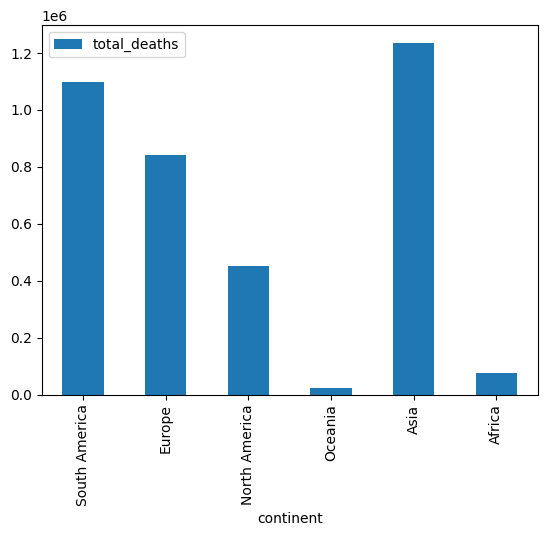

In [45]:
mortes_continente.reset_index().plot.bar(x = "continent", y="total_deaths")

<Axes: xlabel='continent'>

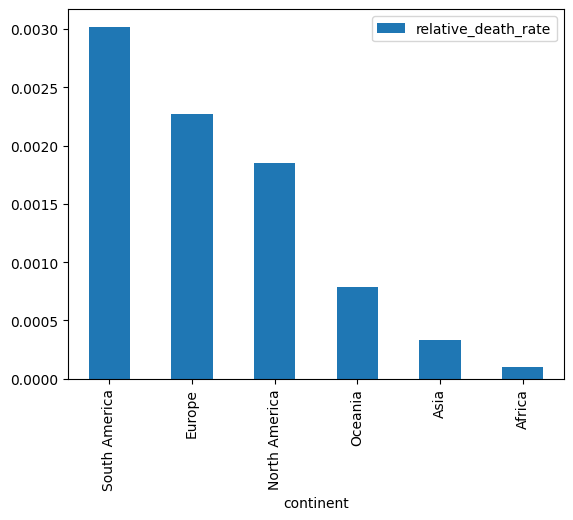

In [46]:
mortes_continente.reset_index().plot.bar(x = "continent", y="relative_death_rate")

##Visualizando a coluna densidade populacional

In [23]:
vacinas[["location", "population_density"]].head()

,location,population_density
0,Afghanistan,54.42
1,Afghanistan,54.42
2,Afghanistan,54.42
3,Afghanistan,54.42
4,Afghanistan,54.42


In [ ]:
vacinas['population_density'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 70864 entries, 0 to 70863
Series name: population_density
Non-Null Count  Dtype  
--------------  -----  
64878 non-null  float64
dtypes: float64(1)
memory usage: 553.8 KB


In [ ]:
vacinas['population_density'].max()

1935.91

In [ ]:
total.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772.0,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
